In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
np.random.seed(123)
import pandas as pd

In [ ]:
# A bank found that the average number of cars waiting during the noon hour at a drive-up 
# window follows a Poisson distribution with a mean of 2 cars. Make a chart of this 
# distribution and answer these questions concerning the probability of cars waiting
# at the drive-up window.

# What is the probability that no cars drive up in the noon hour?
# What is the probability that 3 or more cars come through the drive through?
# How likely is it that the drive through gets at least 1 car?

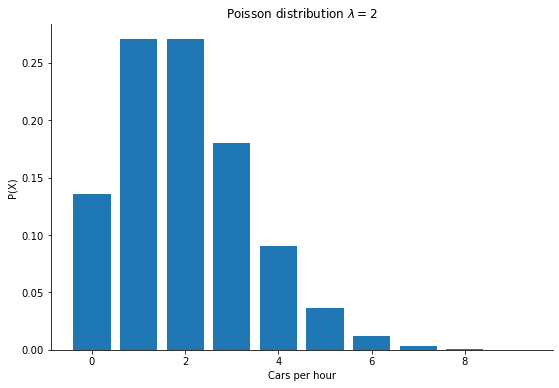

In [22]:
cars=stats.poisson(2)
λ=2
x= np.arange(0,10)
y=stats.poisson(λ).pmf(x)
plt.bar(x,y)
plt.xlabel('Cars per hour')
plt.ylabel('P(X)')
plt.title('Poisson distribution $λ = 2$');



In [23]:
# What is the probability that no cars drive up in the noon hour?
cars.pmf(0)

0.1353352832366127

In [24]:
# What is the probability that 3 or more cars come through the drive through?
cars.sf(2)

0.32332358381693654

In [26]:
# How likely is it that the drive through gets at least 1 car?
cars.cdf(1)

0.40600584970983794

In [ ]:
# Grades of State University graduates are normally distributed with a mean of 3.0 and a 
# standard deviation of .3. Calculate the following:

# What grade point average is required to be in the top 5% of the graduating class?
# What GPA constitutes the bottom 15% of the class?
# An eccentric alumnus left scholarship money for students in the third decile from the 
# bottom of their class. Determine the range of the third decile. Would a student with a 
# 2.8 grade point average qualify for this scholarship?
# If I have a GPA of 3.5, what percentile am I in?

In [29]:
μ = 3
σ = .3

grades = stats.norm(μ, σ)
grades

In [32]:
# What grade point average is required to be in the top 5% of the graduating class?
top_5 = grades.ppf(.95)
top_5

3.4934560880854417

In [34]:
# What GPA constitutes the bottom 15% of the class?
bottom_15 = grades.ppf(.15)
bottom_15

2.689069983151863

In [37]:
# An eccentric alumnus left scholarship money for students in the third decile from the 
# bottom of their class. Determine the range of the third decile. Would a student with a 
# 2.8 grade point average qualify for this scholarship?
third_decile = grades.ppf(.3)
third_decile
#2.84 > 2.8 not qualify

2.842679846187588

In [40]:
# If I have a GPA of 3.5, what percentile am I in?
grades.cdf(3.5)

0.9522096477271853

In [ ]:
# A marketing website has an average click-through rate of 2%. One day they observe 4326 
# visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [42]:
traffic = stats.binom(4326, .02)

In [43]:
clicks = traffic.sf(96)       

clicks

0.13975823631416445

In [ ]:
# You are working on some statistics homework consisting of 100 questions where all of 
# the answers are a probability rounded to the hundreths place. Looking to save time, you 
# put down random probabilities as the answer to each question.

# What is the probability that at least one of your first 60 answers is correct?

In [44]:
homework = stats.binom(60, .01).sf(0)

homework

0.45284335760923855

In [49]:
# The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they 
# visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit 
# the break area. How likely is it that the break area gets cleaned up each day? How likely 
# is it that it goes two days without getting cleaned up? All week?

In [45]:
n_visitors = .9 * 3 * 22
clean = stats.binom(n_visitors, .03)

In [47]:
#How likely is it that the break area gets cleaned up each day?
everyday = clean.sf(0)
everyday

0.8362274861228873

In [51]:
#How likely is it that the break area gets cleaned up each day?
twodays_notclean = clean.cdf(0) ** 2
twodays_notclean

0.02682143630162907

In [53]:
#All week?

week = clean.cdf(0) ** 5
week

0.00011781621791055136

In [ ]:
# You want to get lunch at La Panaderia, but notice that the line is usually very 
# long at lunchtime. After several weeks of careful observation, you notice that the 
# average number of people in line when your lunch break starts is normally distributed 
# with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to 
# order, and 10 minutes from ordering to getting your food, what is the likelihood that you 
# have at least 15 minutes left to eat your food before you have to go back to class? Assume 
# you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [55]:
μ = 15
σ = 3

line = stats.norm(μ, σ)
people = (60 - 15 - 10) // 2
p15 = line.cdf(people)
p15

0.7475074624530771

In [ ]:
# Connect to the employees database and find the average salary of 
# current employees, along with the standard deviation. For the following 
# questions, calculate the answer based on modeling the employees salaries 
# with a normal distribution defined by the calculated mean and standard deviation 
# then compare this answer to the actual values present in the salaries dataset.

# What percent of employees earn less than 60,000?
# What percent of employees earn more than 95,000?
# What percent of employees earn between 65,000 and 80,000?
# What do the top 5% of employees make?

In [58]:
import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
pd.read_sql('SELECT * FROM departments', url)

,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing
5,d004,Production
6,d006,Quality Management
7,d008,Research
8,d007,Sales


In [59]:
salaries = pd.read_sql(query,url)

In [60]:
mean = salaries['salary'].mean()
std = salaries['salary'].std()

In [ ]:

# salary_dist = stats.norm(mean,std)
# under_60k = salary_dist.cdf(60_000)
# over_95k = salary_dist.sf(95_000)
# between_65k_and_80k = salary_dist.cdf(80_000) - salary_dist.sf(65_000)
# top_5 = salary_dist.isf(.05)

In [62]:
salary_dist = stats.norm(mean,std)
salary_dist

In [63]:
# What percent of employees earn less than 60,000?
under_60 = salary_dist.cdf(60000)
under_60

0.24385742480214423

In [64]:
# What percent of employees earn more than 95,000?
morethan_95 = salary_dist.sf(95000)
morethan_95

0.09208819199804053

In [65]:
# What percent of employees earn between 65,000 and 80,000?
between_65_and_80 = salary_dist.cdf(80000)-salary_dist.cdf(65000)
between_65_and_80

0.3350605685446666

In [67]:
# What do the top 5% of employees make?
top = salary_dist.isf(.05)
top

100484.64454102777